In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime

In [2]:
class Config:
    pass
config = pd.read_pickle('config.pkl')
print(dir(config))

data_path = '../../kaggleData/JD_logging/'
feature_path = '../../kaggleData/JD_logging/features/'

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'data_path', 'feature_dict', 'feature_path', 'model_features', 'result_path', 'single_module_validation_indice_set', 'trade_train_size', 'train_2_6_index']


In [20]:
login_tt = pd.read_csv(data_path+'login_tt.csv')
trade_tt = pd.read_csv(data_path+'trade_tt.csv')

login_tt['time'] = login_tt['time'].apply(lambda x : datetime.datetime.strptime(x , '%Y-%m-%d %H:%M:%S'))
trade_tt['time'] = trade_tt['time'].apply(lambda x : datetime.datetime.strptime(x , '%Y-%m-%d %H:%M:%S'))

In [6]:
def find_related_logins_before(row,login_table,*args,**kw):
    related_logins = login_table[login_table['id'] == row.id]
    related_logins_before = related_logins[related_logins['time']<row.time]
    return related_logins_before    

def find_related_recent_logins_within_days(row,login_table,days,*args,**kw):    
    recent_logins = find_related_logins_before(row,login_table)
    if len(recent_logins)>0:
        recent_logins['from_now'] =  row.time - recent_logins['time']
        return recent_logins[recent_logins['from_now']<datetime.timedelta(days = days)]
    else:
        recent_logins['from_now'] = np.nan
        return recent_logins[recent_logins['from_now']<datetime.timedelta(days = days)]
        
def find_related_trades_before(row,trade_table,*args,**kw):
    related_trades = trade_table[trade_table['id'] == row.id]
    related_trades_before = related_trades[related_trades['time']<row.time]
    return related_trades_before    

def find_related_recent_trades_within_days(row,trade_table,days,*args,**kw):    
    recent_trades = find_related_trades_before(row,trade_table)
    if len(recent_trades)>0:
        recent_trades['from_now'] =  row.time - recent_trades['time']
        return recent_trades[recent_trades['from_now']<datetime.timedelta(days = days)]  
    else:
        recent_trades['from_now'] = np.nan
        return recent_trades[recent_trades['from_now']<datetime.timedelta(days = days)]

<Container object of 24 artists>

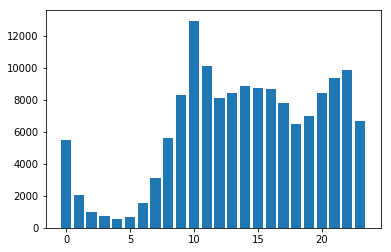

In [7]:
%matplotlib inline
trade_tt['time_hour'] = trade_tt['time'].apply(lambda x : x.hour)
plt.bar(range(24),trade_tt.groupby('time_hour').size())


In [8]:
trade_tt.groupby('time_hour').size()

time_hour
0      5465
1      2052
2      1018
3       733
4       578
5       678
6      1546
7      3099
8      5642
9      8309
10    12941
11    10128
12     8103
13     8399
14     8889
15     8709
16     8672
17     7786
18     6489
19     6994
20     8443
21     9382
22     9874
23     6665
dtype: int64

In [9]:
login_tt

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,from
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19,train
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45,train
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20,train
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18,train
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01,train
5,8.828481e+15,5.0,736541,10,1026491,194,1,1.428220e+09,1,116825,True,False,2015-04-05 15:48:07,train
6,6.071119e+15,13000.0,979465,2,1026491,194,1,1.431851e+09,3,116825,False,False,2015-05-17 16:27:55,train
7,8.525176e+15,17627.0,765534,1,1026491,194,1,1.426584e+09,1,109987,False,False,2015-03-17 17:19:04,train
8,3.120145e+15,12000.0,12239,2,1026491,194,1,1.427789e+09,3,116825,False,False,2015-03-31 15:58:48,train
9,5.367905e+15,9146.0,556157,1,1026491,194,31,1.431252e+09,1,109987,False,False,2015-05-10 18:06:52,train


In [10]:
def get_day_period(time):
    if time.hour ==0 or time .hour>17:
        #18-0
        return 0
    elif time.hour>14:
        #15-17
        return 1
    elif time.hour>11:
        #12-15
        return 2
    elif time.hour>7:
        #8-11
        return 3
    else:
        #1-7
        return 4

def is_weekend(time):
    if time.day ==6 or time.day ==7:
        return True
    else:
        return False

In [11]:
#generting features to be summaried 
login_tt['day_period']=login_tt['time'].apply(lambda x :get_day_period(x))
login_tt['is_weekend']=login_tt['time'].apply(lambda x :is_weekend(x))
trade_tt['day_period']=trade_tt['time'].apply(lambda x :get_day_period(x))
trade_tt['is_weekend']=trade_tt['time'].apply(lambda x :is_weekend(x))

In [12]:
recent_login_table = find_related_logins_before(trade_tt.iloc[104251],login_tt)
recent_trade_table = find_related_trades_before(trade_tt.iloc[104251],trade_tt)

In [13]:
recent_login_table

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,from,day_period,is_weekend
13429,4.761252e+15,7000.0,835072,2,318605,406,1,1.420968e+09,3,159709,False,False,2015-01-11 17:14:04,train,1,False
13430,6.961838e+14,8000.0,835072,2,318605,406,1,1.420968e+09,3,159709,False,False,2015-01-11 17:14:03,train,1,False
138281,5.118755e+15,5000.0,835072,2,125804,406,1,1.421767e+09,3,159709,False,False,2015-01-20 23:13:22,train,0,False
221895,5.756317e+15,40235.0,984873,1,1161049,44,31,1.425113e+09,3,159709,False,False,2015-02-28 16:51:25,train,1,False
221896,4.546503e+16,30851.0,984873,1,1161049,44,1,1.424416e+09,3,159709,False,False,2015-02-20 15:02:55,train,1,False
221897,3.436560e+15,32980.0,984873,1,1161049,44,31,1.425113e+09,3,159709,False,False,2015-02-28 16:51:18,train,1,False
221898,9.974436e+15,19136.0,984873,1,1161049,44,31,1.425113e+09,3,159709,False,False,2015-02-28 16:51:04,train,1,False
221899,9.310573e+15,48224.0,984873,1,1161049,44,31,1.424590e+09,3,159709,False,False,2015-02-22 15:23:41,train,1,False
221900,4.363875e+16,54468.0,984873,1,1161049,44,1,1.424590e+09,3,159709,False,False,2015-02-22 15:23:47,train,1,False
221901,3.007027e+15,19632.0,984873,1,1161049,44,31,1.425115e+09,3,159709,False,False,2015-02-28 17:16:04,train,1,False


In [14]:
np.sum(recent_login_table['result']>0)

29

In [15]:
def build_habit_feature(recent_login_table,recent_trade_table):
    result_dict = {}
    login_size = recent_login_table.shape[0]
    trade_size = recent_trade_table.shape[0]
    success_login_size = np.sum(recent_login_table['result']>0)
    fail_login_size = login_size - success_login_size
    
    #is_scan
    result_dict['is_scan_count'] = np.sum(recent_login_table['is_scan'])
    result_dict['is_scan_rate'] = result_dict['is_scan_count']*1.0/login_size if login_size!=0 else 0

    #type
    result_dict['type_1_count'] = np.sum(recent_login_table['type']==1)
    result_dict['type_1_rate'] = result_dict['type_1_count']*1.0/login_size if login_size!=0 else 0
    result_dict['type_2_count'] = np.sum(recent_login_table['type']==2)
    result_dict['type_2_rate'] = result_dict['type_2_count']*1.0/login_size  if login_size!=0 else 0
    result_dict['type_3_count'] = np.sum(recent_login_table['type']==3)
    result_dict['type_3_rate'] = result_dict['type_3_count']*1.0/login_size  if login_size!=0 else 0
    
    #log_from
    log_from_count_list = [1,2,10,11,21]
    for value in log_from_count_list:
        result_dict['log_from_'+str(value)+'_count'] = np.sum(recent_login_table['log_from']==value)
        result_dict['log_from_'+str(value)+'_rate'] = result_dict['log_from_'+str(value)+'_count']*1.0/login_size if login_size!=0 else 0
    
    #success
    success_types = [1,31]
    for value in success_types:
        result_dict['success_'+str(value)+'_count'] = np.sum(recent_login_table['result']==value)
        result_dict['success_'+str(value)+'_rate'] = result_dict['success_'+str(value)+'_count']*1.0/success_login_size if success_login_size!=0 else 0
        
    #fail
    fail_types = [-1,-2]
    for value in fail_types:
        result_dict['fail_'+str(value)+'_count'] = np.sum(recent_login_table['result']==value)
        result_dict['fail_'+str(value)+'_rate'] = result_dict['fail_'+str(value)+'_count']*1.0/fail_login_size if fail_login_size!=0 else 0
    
    #getting statistics for day period
    for period in range(5):
        period_login_table = recent_login_table[recent_login_table['day_period']==period]
        period_trade_table = recent_trade_table[recent_trade_table['day_period']==period]
        result_dict['period_'+str(period)+'_login_times'] = period_login_table.shape[0]
        result_dict['period_'+str(period)+'_login_rate']  = period_login_table.shape[0]*1.0/login_size if login_size!=0 else 0
        result_dict['period_'+str(period)+'_trade_times'] = period_trade_table.shape[0]
        result_dict['period_'+str(period)+'_trade_rate']  = period_trade_table.shape[0]*1.0/trade_size if trade_size!=0 else 0
    return result_dict

In [16]:
def get_multiple_feature_dicts_wihtin_days(id_row_tuple,login_table,trade_table,feature_generating_function):
    row = id_row_tuple[1]
    ori_id = id_row_tuple[0]
    
    date_range = [360,30]
    result_dict = {}
    for days in date_range:
        if days ==360:
            recent_trade_table = find_related_recent_trades_within_days(row,trade_table,days)
            recent_login_table = find_related_recent_logins_within_days(row,login_table,days)
        else:
            recent_trade_table = find_related_recent_trades_within_days(row,recent_trade_table,days)
            recent_login_table = find_related_recent_logins_within_days(row,recent_login_table,days)
        
        result_dict[days] = feature_generating_function(recent_login_table,recent_trade_table)    
    return ori_id,row.rowkey,result_dict

In [17]:
get_multiple_feature_dicts_wihtin_days((1,trade_tt.iloc[32145]),login_tt,trade_tt,build_habit_feature)

(1,
 442414,
 {30: {'fail_-1_count': 0,
   'fail_-1_rate': 0.0,
   'fail_-2_count': 0,
   'fail_-2_rate': 0.0,
   'is_scan_count': 10,
   'is_scan_rate': 0.55555555555555558,
   'log_from_10_count': 10,
   'log_from_10_rate': 0.55555555555555558,
   'log_from_11_count': 0,
   'log_from_11_rate': 0.0,
   'log_from_1_count': 3,
   'log_from_1_rate': 0.16666666666666666,
   'log_from_21_count': 0,
   'log_from_21_rate': 0.0,
   'log_from_2_count': 5,
   'log_from_2_rate': 0.27777777777777779,
   'period_0_login_rate': 0.16666666666666666,
   'period_0_login_times': 3,
   'period_0_trade_rate': 0,
   'period_0_trade_times': 0,
   'period_1_login_rate': 0.3333333333333333,
   'period_1_login_times': 6,
   'period_1_trade_rate': 0,
   'period_1_trade_times': 0,
   'period_2_login_rate': 0.3333333333333333,
   'period_2_login_times': 6,
   'period_2_trade_rate': 0,
   'period_2_trade_times': 0,
   'period_3_login_rate': 0.16666666666666666,
   'period_3_login_times': 3,
   'period_3_trade_rat

In [19]:
#trade_tt['stat_result_dicts'] = trade_tt.apply(lambda row : get_multiple_feature_dicts_wihtin_days(row,login_tt,trade_tt),axis = 1)
#trade_tt.to_pickle(data_path+'trade_tt_stat_C_temp.pkl')
"""
works on spark
"""
import pyspark as spark

conf = spark.SparkConf().setAppName('jupyter_backend').setMaster('local[15]')\
        .set('spark.executor.memory','2g')\
        .set('spark.default.parallelism','112')
sc = spark.SparkContext(conf=conf)

#packing the rdd for spark
trade_tt_rdd_buffer = []
for (idx,row) in trade_tt.iterrows():
    trade_tt_rdd_buffer.append((idx,row))
trade_tt_rdd = sc.parallelize(trade_tt_rdd_buffer)

result_rdd = trade_tt_rdd.map(lambda x : get_multiple_feature_dicts_wihtin_days(x,login_tt,trade_tt,build_habit_feature))
result_rdd_buffer = result_rdd.collect()

#getting the new feature names
recent_trade_example=find_related_recent_trades_within_days(trade_tt.loc[0],trade_tt,30)
recent_login_example=find_related_recent_logins_within_days(trade_tt.loc[0],login_tt,30)

date_range_list = [30,360]
feature_list = list(build_habit_feature(recent_login_example,recent_trade_example).keys())

#unstacking the result_rdd_dict
result_rdd_to_df_buffer = []
for ori_id,rowkey,result_dict in result_rdd_buffer:
    unit_dict= {}
    unit_dict['ori_id'] = ori_id
    unit_dict['rowkey'] = rowkey
    
    for date_range in date_range_list:
        for feature in feature_list:
            unit_dict[feature+'_'+str(date_range)] = result_dict[date_range][feature]
    
    result_rdd_to_df_buffer.append(unit_dict)
result_df = pd.DataFrame(result_rdd_to_df_buffer)


In [21]:
#result_df.to_csv(data_path+'temp/feature_set_d_e.csv',index = False)

result_df = pd.read_csv(data_path+'temp/feature_set_d_e.csv')
print(np.sum(result_df['rowkey']!=trade_tt['rowkey']))
print(np.sum(result_df['ori_id']!=trade_tt.index))

0
0


In [13]:
len(result_df.columns)

94

In [22]:
del result_df['rowkey']
del result_df['ori_id']
trade_tt = pd.concat([trade_tt,result_df],axis = 1)
print(trade_tt.shape)

feature_list = list(trade_tt.columns)
feature_list.remove('rowkey')
feature_list.remove('time')
feature_list.remove('id')
feature_list.remove('from')

trade_tt = trade_tt.fillna(-10)

for feature in feature_list:
    pd.to_pickle(trade_tt[feature].values,feature_path+feature+'.pkl')

(150594, 96)


In [24]:
feature_emptyness = {}
feature_emptyness_list = []
data_size = trade_tt.shape[0]
for feature in feature_list:
    feature_emptyness[feature] = np.sum(trade_tt[feature] == -10)*1.0/data_size
    feature_emptyness_list.append((feature,feature_emptyness[feature]))

In [30]:
#check if any inf,-inf,nan
for feature in feature_list:
    if np.sum(trade_tt[feature]==np.inf)>0:
        print("inf exist for %s",feature)
    if np.sum(trade_tt[feature]==-np.inf)>0:
        print(" -inf exist for %s",feature)
    try:
        if np.sum(np.isnan(trade_tt[feature]))>0:
            print("nan exist for %s",feature)
    except:
        print("failed to check nan for %s, type is %s",feature,str(trade_tt[feature].dtype))

In [32]:
feature_list

['fail_-1_count_30',
 'fail_-1_count_360',
 'fail_-1_rate_30',
 'fail_-1_rate_360',
 'fail_-2_count_30',
 'fail_-2_count_360',
 'fail_-2_rate_30',
 'fail_-2_rate_360',
 'is_scan_count_30',
 'is_scan_count_360',
 'is_scan_rate_30',
 'is_scan_rate_360',
 'log_from_10_count_30',
 'log_from_10_count_360',
 'log_from_10_rate_30',
 'log_from_10_rate_360',
 'log_from_11_count_30',
 'log_from_11_count_360',
 'log_from_11_rate_30',
 'log_from_11_rate_360',
 'log_from_1_count_30',
 'log_from_1_count_360',
 'log_from_1_rate_30',
 'log_from_1_rate_360',
 'log_from_21_count_30',
 'log_from_21_count_360',
 'log_from_21_rate_30',
 'log_from_21_rate_360',
 'log_from_2_count_30',
 'log_from_2_count_360',
 'log_from_2_rate_30',
 'log_from_2_rate_360',
 'period_0_login_rate_30',
 'period_0_login_rate_360',
 'period_0_login_times_30',
 'period_0_login_times_360',
 'period_0_trade_rate_30',
 'period_0_trade_rate_360',
 'period_0_trade_times_30',
 'period_0_trade_times_360',
 'period_1_login_rate_30',
 'per

In [33]:
config.feature_dict['llc_user_habbit']=feature_list 

In [34]:
pd.to_pickle(config,'config.pkl')